In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from sklearn.ensemble import RandomForestClassifier
from sktime.classification.kernel_based import RocketClassifier
from sklearn.metrics import accuracy_score
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sklearn.pipeline import Pipeline
from sktime.classification.interval_based import (
    CanonicalIntervalForest,
    DrCIF,
    RandomIntervalSpectralEnsemble,
    SupervisedTimeSeriesForest,
    TimeSeriesForestClassifier,
)
from sklearn import metrics
from sktime.transformations.panel.reduce import Tabularizer
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [2]:
#CSV読み込み；全データをデータフレームのまとめる
path = '.\\dataset'

all_files = glob.glob(path + "\\**\\*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None,usecols=[2])
    li.append(df)

X_df = pd.concat(li, axis=1, ignore_index=True)
X_df = X_df.T
Y_df =np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1])

In [3]:
print("X Y shape = " + str(X_df.shape[0]) + " " + str(len(Y_df)))

X Y shape = 20 20


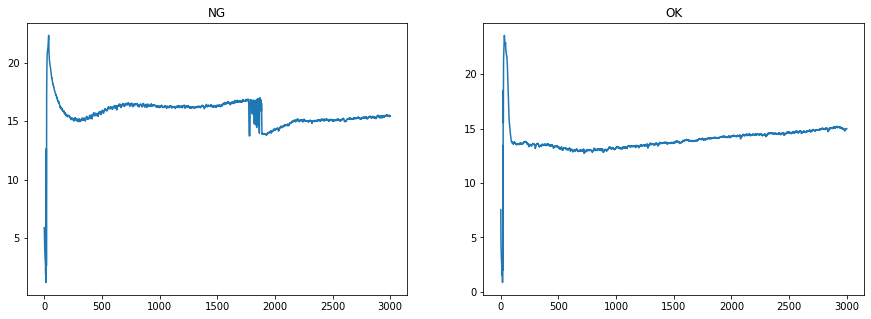

In [4]:
##MATPLOTLIB
fig = plt.figure(figsize=[15,5])
fig.add_subplot(1, 2, 1)
plt.title("NG")
plt.plot(X_df.T[0])

fig.add_subplot(1, 2, 2)
plt.title("OK")
plt.plot(X_df.T[12])


In [5]:
X_df_tab = from_2d_array_to_nested(X_df)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_df_tab, Y_df)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(15, 1) (15,) (5, 1) (5,)


In [7]:
classifier = make_pipeline(Tabularizer(), RandomForestClassifier())
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

classifier_preds = classifier.predict(X_test)
print("RandomForestClassification Accuracy: " + str(metrics.accuracy_score(y_test, classifier_preds)))


RandomForestClassification Accuracy: 1.0


In [8]:
rocket = RocketClassifier()
rocket.fit(X_train, y_train)
rocket.score(X_test, y_test)

rocket_preds = rocket.predict(X_test)
print("Rocket Accuracy: " + str(metrics.accuracy_score(y_test, rocket_preds)))

Rocket Accuracy: 1.0


In [10]:
tsfresh = TSFreshFeatureExtractor(default_fc_parameters="minimal")
randf = RandomForestClassifier(n_estimators=100)
fclassifier = Pipeline(
    [
        ("transform", tsfresh),
        ("classifier", randf),
    ]
)
fclassifier.fit(X_train, y_train)
fclassifier.score(X_test, y_test)

fclassifier_preds = fclassifier.predict(X_test)
print("Feature Classifier Accuracy: " + str(metrics.accuracy_score(y_test, fclassifier_preds)))

Feature Extraction: 100%|██████████| 5/5 [00:03<00:00,  1.60it/s]

Feature Classifier Accuracy: 1.0


In [11]:
tsf = TimeSeriesForestClassifier(n_estimators=50, random_state=47)
tsf.fit(X_train, y_train)
tsf.score(X_test, y_test)

tsf_preds = tsf.predict(X_test)
print("TSF Accuracy: " + str(metrics.accuracy_score(y_test, tsf_preds)))

TSF Accuracy: 1.0


In [12]:
rise = RandomIntervalSpectralEnsemble(n_estimators=50, random_state=47)
rise.fit(X_train, y_train)

rise_preds = rise.predict(X_test)
print("RISE Accuracy: " + str(metrics.accuracy_score(y_test, rise_preds)))

RISE Accuracy: 1.0


In [13]:
stsf = SupervisedTimeSeriesForest(n_estimators=50, random_state=47)
stsf.fit(X_train, y_train)

stsf_preds = stsf.predict(X_test)
print("STSF Accuracy: " + str(metrics.accuracy_score(y_test, stsf_preds)))

STSF Accuracy: 1.0
